#### Matplotlib has an extensive codebase library that can visualize data in a more meaningful way

#### What is Matplotlib?

__To make necessary statistical inferences, it becomes necessary to visualize your data and Matplotlib is one such solution for the Python users. It is a very powerful plotting library useful for those working with Python and NumPy__. The most used module of Matplotib is Pyplot which provides an interface like MATLAB but instead, it uses Python and it is open source.


#### Installing Matplotlib
python -m pip install -U pip

python -m pip install -U matplotlib


Plotting requires action on a range of levels, from the most general (e.g., 'contour this 2-D array') to the most specific (e.g., 'color this screen pixel red'). The purpose of a plotting package is to assist you in visualizing your data as easily as possible, with all the necessary control -- that is, by using relatively high-level commands most of the time, and still have the ability to use the low-level commands when needed.

Therefore, __everything in matplotlib is organized in a hierarchy. At the top of the hierarchy is the matplotlib "state-machine environment"__ which is provided by the matplotlib.pyplot module. __At this level, simple functions are used to add plot elements (lines, images, text, etc.) to the current axes in the current figure.__


__The next level down in the hierarchy is the first level of the object-oriented interface__, in which pyplot is used only for a few functions such as figure creation, and the user explicitly creates and keeps track of the figure and axes objects. __At this level, the user uses pyplot to create figures, and through those figures, one or more axes objects can be created. These axes objects are then used for most plotting actions__

#### For even more control -- which is essential for things like embedding matplotlib plots in GUI applications -- the pyplot level may be dropped completely, leaving a purely object-oriented approach

In [3]:
# sphinx_gallery_thumbnail_number = 3
import matplotlib.pyplot as plt
import numpy as np

### Parts of a Figure

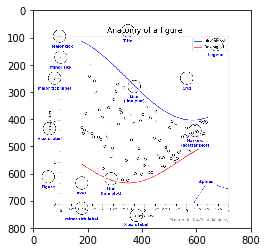

In [2]:
import matplotlib.image as mpimg
img = mpimg.imread('figure parts.png')
imgplot = plt.imshow(img)

#### Figure
The whole figure. __The figure keeps track of all the child Axes, a smattering of 'special' artists (titles, figure legends, etc), and the canvas.__ (Don't worry too much about the canvas, it is crucial as it is the object that actually does the drawing to get you your plot, but as the user it is more-or-less invisible to you). __A figure can have any number of Axes, but to be useful should have at least one.__


The easiest way to create a new figure is with pyplot:

1. using plt.figure() command

In [3]:
fig = plt.figure()  # an empty figure with no axes
fig.suptitle('No axes on this figure')  # Add a title so we know which it is
fig.show()

E:\Study\ML\Anaconda\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


<Figure size 432x288 with 0 Axes>

2. using plt.subplots() command

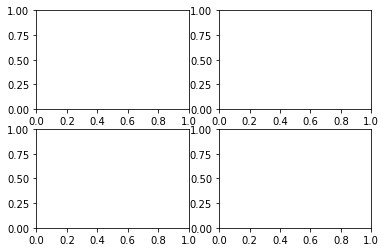

In [10]:
fig, ax_lst = plt.subplots(2, 2) # a figure with a 2x2 grid of Axes

#### Axes

__This is what you think of as ’a plot’, it is the region of the image with the data space. A given
figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes
contains two (or three in the case of 3D) Axis objects__ (be aware of the difference between
Axes and Axis) which take care of the __data limits__ (the data limits can also be controlled via
set via the __``set_xlim()`` and ``set_ylim()`` Axes methods__). Each Axes has a __title__ (set via __``set_title()``__),
an x-label (set via __``setxlabel()``__), and a y-label set via __``set_ylabel()``__).
The Axes class and it’s member functions are the primary entry point to working with the OO
interface.


#### Axis

__These are the number-line-like objects. They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks)__. The location
of the ticks is determined by a Locator object and the ticklabel strings are formatted by a
Formatter. __The combination of the correct ``Locator`` and ``Formatter`` gives very fine control over
the tick locations and labels__.


#### Artist

__Basically everything you can see on the figure is an artist__ (even the Figure, Axes, and Axis
objects). This includes Text objects, Line2D objects, collection objects, Patch objects ... (you
get the idea). When the figure is rendered, all of the artists are drawn to the canvas. __Most
Artists are tied to an Axes__; such an Artist cannot be shared by multiple Axes, or moved from
one to another.

### Types of inputs to plotting functions

__All of plotting functions expect np.array or np.ma.masked_array as input__. Classes that are
’array-like’ such as pandas data objects and np.matrix may or may not work as intended. It is
__best to convert these to np.array objects prior to plotting__.


For example, to convert a pandas.DataFrame

In [19]:
import pandas as pd
a = pd.DataFrame(np.random.rand(4,5), columns = list('abcde'))
a_asarray = a.values

and to convert a np.matrix

In [20]:
b = np.matrix([[1,2],[3,4]])
b_asarray = np.asarray(b)

#### Matplotlib, pyplot and pylab: how are they related?

__Matplotlib is the whole package and matplotlib.pyplot is a module in Matplotlib.__
For functions in the pyplot module, there is always a ”current” figure and axes (which is
created automatically on request). For example, in the following example, the first call to
plt.plot creates the axes, then subsequent calls to plt.plot add additional lines on the same
axes, and plt.xlabel, plt.ylabel, plt.title and plt.legend set the axes labels and title and
add a legend.

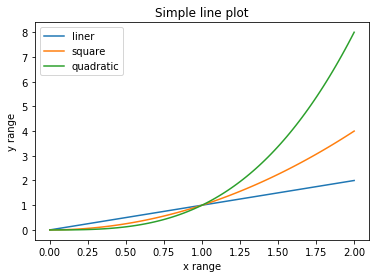

In [2]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0,2,100)
t
plt.plot(t,t,label="liner")
plt.plot(t,t**2,label="square")
plt.plot(t,t**3,label="quadratic")

plt.xlabel('x range')
plt.ylabel('y range')

plt.title('Simple line plot')
plt.legend()
plt.show()


__pylab is a convenience module that bulk imports matplotlib.pyplot (for plotting) and numpy
(for mathematics and working with arrays) in a single namespace__. pylab is __deprecated__ and
its use is strongly discouraged because of namespace pollution. Use pyplot instead.
For non-interactive plotting it is suggested to use pyplot to create the figures and then the
OO interface for plotting

### Coding Styles

Of the different styles, there are two that are officially supported. Therefore, these are the
preferred ways to use matplotlib.

For the pyplot style, the imports at the top of your scripts will typically be:

In [22]:
import matplotlib.pyplot as plt
import numpy as np

Then one calls, for example, np.arange, np.zeros, np.pi, plt.figure, plt.plot, plt.show, etc. Use
the pyplot interface for creating figures, and then use the object methods for the rest:

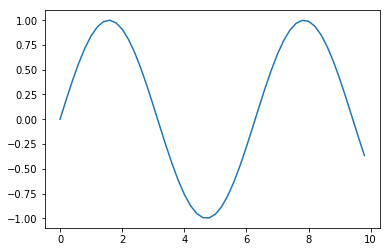

In [23]:
x = np.arange(0, 10, 0.2)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

So, why all the extra typing instead of the MATLAB-style (which relies on global state and a flat
namespace)? For very simple things like this example, the only advantage is academic: the
wordier styles are more explicit, more clear as to where things come from and what is going
on. For more complicated applications, this explicitness and clarity becomes increasingly
valuable, and the richer and more complete object-oriented interface will likely make the
program easier to write and maintain.

Typically one finds oneself making the same plots over and over again, but with different
data sets, which leads to needing to write specialized functions to do the plotting. The recommended function signature is something like:

In [5]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph
    Parameters
    ----------
    ax : Axes
    The axes to draw to
    data1 : array
    The x data
    data2 : array
    The y data
    param_dict : dict
    Dictionary of kwargs to pass to ax.plot
    Returns
    -------
    out : list
    list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

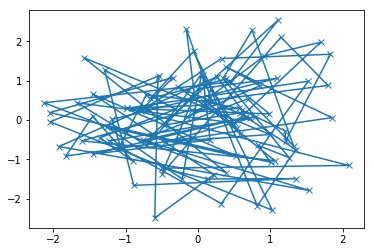

In [6]:
# which you would then use as:
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})

or if you wanted to have 2 sub-plots:

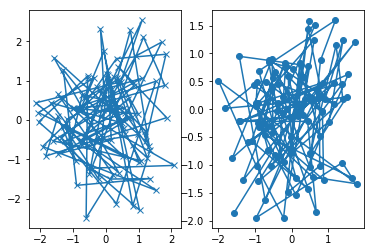

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1,  data1, data2, {'marker': "x"})
#plt.show()
my_plotter(ax2,  data3, data4, {'marker': "o"})
plt.show()

Again, for these simple examples this style seems like overkill, however once the graphs get
slightly more complex it pays off.

### What is interactive mode?

__Use of an interactive backend permits–but does not by itself require or ensure–plotting to the screen.  Whether and when plotting to the screen occurs, and whether a script or shell session continues after a plot is drawn on the screen, depends on
the functions and methods that are called, and on a state variable that determines whether matplotlib is in ”interactive mode”.__

The default Boolean value is set by the __matplotlibrc file__, and may be customized like any other configuration parameter (see Customizing Matplotlib
with style sheets and rcParams). It may also be set via __matplotlib.interactive()__, and its value
may be queried via __matplotlib.is_interactive()__. Turning interactive mode on and off in the
middle of a stream of plotting commands, whether in a script or in a shell, is rarely needed and
potentially confusing, so in the following we will assume all plotting is done with interactive
mode either on or off.

Interactive mode may also be turned on via __matplotlib.pyplot.ion()__, and turned off via
__matplotlib.pyplot.ioff()__.

#### Interactive example

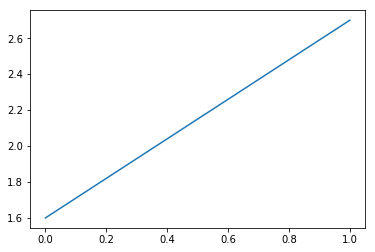

In [10]:
import matplotlib.pyplot as plt
plt.ion()
plt.plot([1.6, 2.7])

Assuming you are running version 1.0.1 or higher, and you have an interactive backend installed and selected by default, you should see a plot, and your terminal prompt should also
be active; you can type additional commands such as:

Text(0.5, 0, 'index')

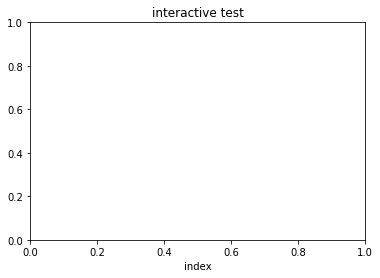

In [9]:
plt.title("interactive test")
plt.xlabel("index")

and you will see the plot being updated after each line. Since version 1.5, modifying the
plot by other means should also automatically update the display on most backends. Get a
reference to the Axes instance, and call a method of that instance:


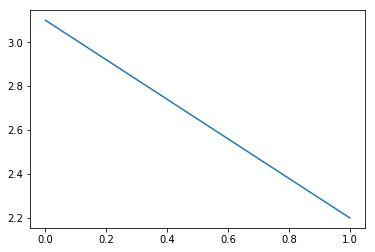

In [11]:
ax = plt.gca()
ax.plot([3.1, 2.2])

If you are using certain backends (like macosx), or an older version of matplotlib, you may not
see the new line added to the plot immediately. In this case, you need to explicitly call draw()
in order to update the plot:

In [12]:
plt.draw()

<Figure size 432x288 with 0 Axes>

#### Non-interactive example

Start a fresh session as in the previous example, but now turn interactive mode off:


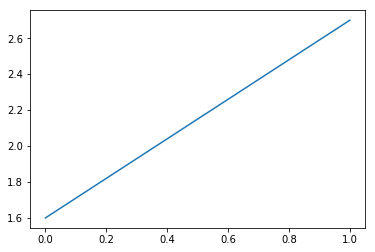

In [17]:
import matplotlib.pyplot as plt
plt.ioff()
plt.plot([1.6, 2.7])

Nothing happened–or at least nothing has shown up on the screen (unless you are using
macosx backend, which is anomalous). To make the plot appear, you need to do this:

In [15]:
plt.show()

Now you see the plot, but your terminal command line is unresponsive; the show() command
blocks the input of additional commands until you manually kill the plot window.

#### What good is this–being forced to use a blocking function? Suppose you need a script that plots the contents of a file to the screen. You want to look at that plot, and then end the script. Without some blocking command such as show(), the script would flash up the plot and then end immediately, leaving nothing on the screen.

#### In addition, non-interactive mode delays all drawing until show() is called; this is more efficient than redrawing the plot each time a line in the script adds a new feature.

__Prior to version 1.0, show() generally could not be called more than once in a single script__
(although sometimes one could get away with it); for version 1.0.1 and above, this restriction
is lifted, so one can write a script like this:

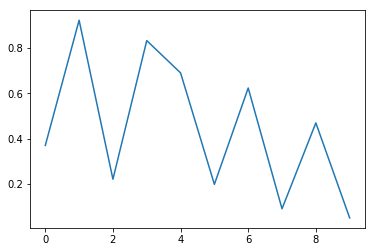

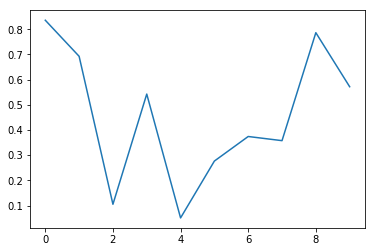

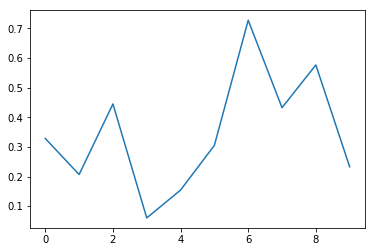

In [18]:
import numpy as np
import matplotlib.pyplot as plt
plt.ioff()
for i in range(3):
    plt.plot(np.random.rand(10))
    plt.show()


which makes three plots, one at a time. I.e. the second plot will show up, once the first plot
is closed.


#### Summary

#### In interactive mode, pyplot functions automatically draw to the screen. When plotting interactively, if using object method calls in addition to pyplot functions, then call draw() whenever you want to refresh the plot.

#### Use non-interactive mode in scripts in which you want to generate one or more figures and display them before ending or generating a new set of figures. In that case, use show() to display the figure(s) and to block execution until you have manually destroyed them.


### Performance

Matplotlib provides a couple
ways to greatly reduce rendering time at the cost of a slight change (to a settable tolerance)
in your plot’s appearance. The methods available to reduce rendering time depend on the
type of plot that is being created

#### Line segment simplification

__For plots that have line segments (e.g. typical line plots, outlines of polygons, etc.), rendering
performance can be controlled by the ``path.simplify`` and ``path.simplify_threshold`` parameters
in your matplotlibrc file__ (see Customizing Matplotlib with style sheets and rcParams for more
information about the matplotlibrc file). The path.simplify parameter is a boolean indicating
whether or not line segments are simplified at all. The path.simplify_threshold parameter
controls how much line segments are simplified; higher thresholds result in quicker rendering.

The following script will first display the data without any simplification, and then display the
same data with simplification. Try interacting with both of them:

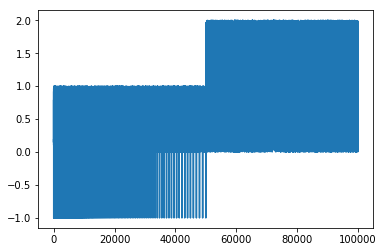

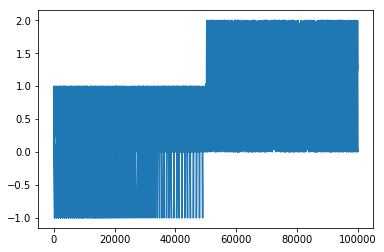

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# Setup, and create the data to plot
y = np.random.rand(100000)
y[50000:] *= 2
y[np.logspace(1, np.log10(50000), 400).astype(int)] = -1

mpl.rcParams['path.simplify'] = True
mpl.rcParams['path.simplify_threshold'] = 0.0
plt.plot(y)
plt.show()

mpl.rcParams['path.simplify_threshold'] = 1.0
plt.plot(y)
plt.show()

Matplotlib currently defaults to a conservative simplification threshold of 1/9

#### Marker simplification

Markers can also be simplified, albeit less robustly than line segments. __Marker simplification
is only available to Line2D objects (through the markevery property). Wherever Line2D construction parameter are passed through, such as matplotlib.pyplot.plot() and matplotlib.axes.Axes.plot(), the markevery parameter can be used__:

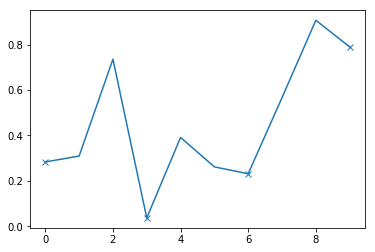

In [30]:
x = np.arange(10)
y = np.random.rand(10)
plt.plot(x, y, markevery=3, marker='x')

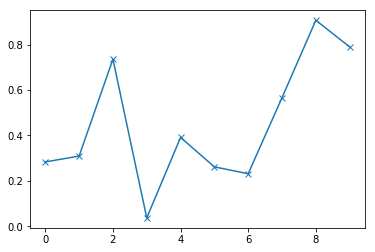

In [33]:
plt.plot(x, y, marker='x')

#### Splitting lines into smaller chunks

If you are using the Agg backend (see What is a backend?), then you can make use of the
agg.path.chunksize rc parameter. This allows you to specify a chunk size, and any lines with
greater than that many vertices will be split into multiple lines, each of which have no more
than agg.path.chunksize many vertices. (Unless agg.path.chunksize is zero, in which case there
is no chunking.) For some kind of data, chunking the line up into reasonable sizes can greatly
decrease rendering time

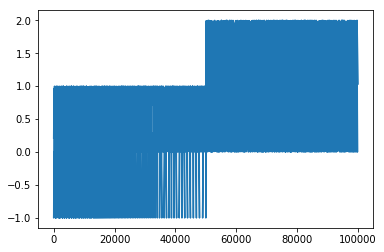

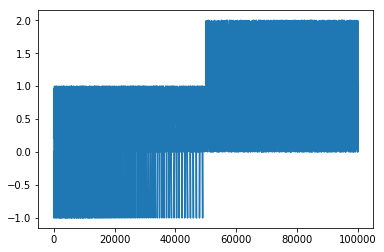

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['path.simplify_threshold'] = 1.0
# Setup, and create the data to plot
y = np.random.rand(100000)
y[50000:] *= 2
y[np.logspace(1,np.log10(50000), 400).astype(int)] = -1

mpl.rcParams['path.simplify'] = True
mpl.rcParams['agg.path.chunksize'] = 0
plt.plot(y)
plt.show()

mpl.rcParams['agg.path.chunksize'] = 500
plt.plot(y)
plt.show()

#### Legends

The default legend behavior for axes attempts to find the location that __covers the fewest data
points (loc='best'). This can be a very expensive computation if there are lots of data points.__
In this case, you may want to provide a specific location.

#### Using the fast style

The fast style can be used to automatically set simplification and chunking parameters to
reasonable settings to speed up plotting large amounts of data. It can be used simply by
running:

In [37]:
import matplotlib.style as mplstyle
mplstyle.use('fast')

It is very light weight, so it plays nicely with other styles, just make sure the fast style is
applied last so that other styles do not overwrite the settings:


In [38]:
mplstyle.use(['dark_background', 'ggplot', 'fast'])